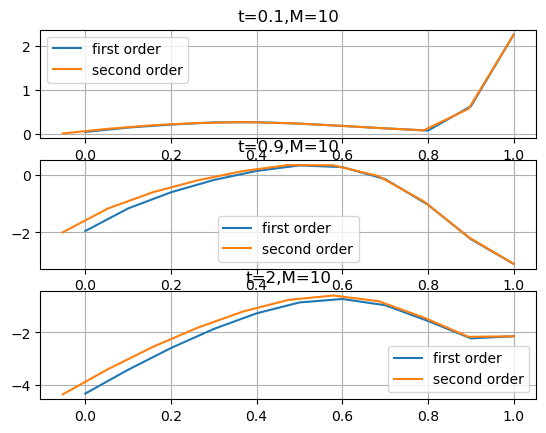

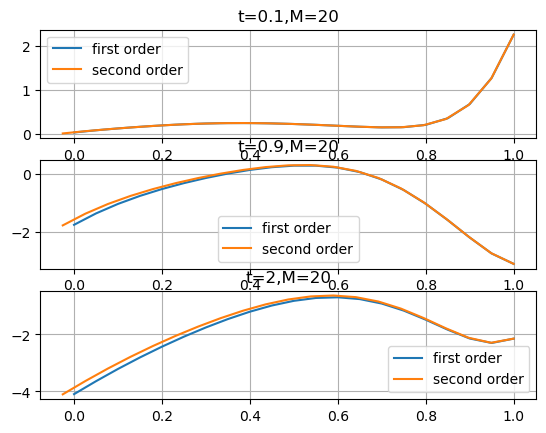

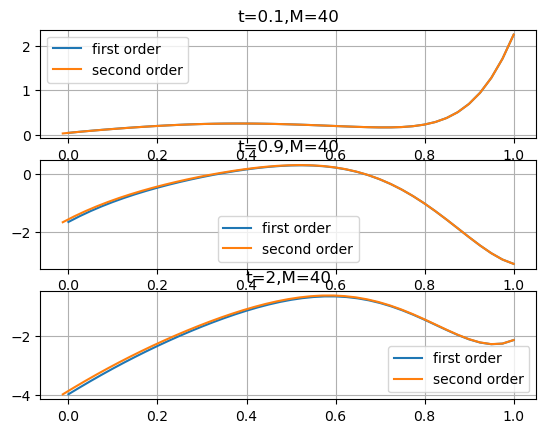

In [12]:
import numpy as np
import matplotlib.pyplot as plt

F=lambda x,t:np.sin(2*np.pi*x)*np.sin(4*np.pi*t)
a=lambda t:10*np.sin(t)
b=lambda t:4*np.sin(6*t)
f=lambda x:(1-x)*x

M_all=[10,20,40]
dt_all=[0.05,0.01,0.002]
T=2.5
nu=0.1

for i in range(3):
    M=M_all[i]
    dt=dt_all[i]
    # first order
    dx1=1/M
    v1=np.zeros((M+1,int(T/dt)+1))
    x1=np.linspace(0,1,M+1)
    v1[:,0]=f(x1)
    for n in range(1,int(T/dt)+1):
        v1[M,n]=b(n*dt)
        for i in range(1,M):
            v1[i,n]=v1[i,n-1]+nu*dt/dx1**2*(v1[i+1,n-1]-2*v1[i,n-1]+v1[i-1,n-1])+dt*F(i*dx1,n*dt)
        v1[0,n]=v1[1,n]-dx1*a(n*dt)

    # second order
    dx2=1/(M-1/2)
    v2=np.zeros((M+1,int(T/dt)+1))
    x2=np.linspace(-dx2/2,1,M+1)
    v2[:,0]=f(x2)
    v2[0,0]=v2[1,0]-dx2*a(0)
    for n in range(1,int(T/dt)+1):
        v2[M,n]=b(n*dt)
        for i in range(1,M):
            v2[i,n]=v2[i,n-1]+nu*dt/dx2**2*(v2[i+1,n-1]-2*v2[i,n-1]+v2[i-1,n-1])+dt*F((i-1/2)*dx2,n*dt)
        v2[0,n]=v2[1,n]-dx2*a(n*dt)
    j=0
    for t in [0.1,0.9,2]:
        j=j+1
        plt.subplot(3,1,j)
        plt.plot(x1,v1[:,int(t/dt)],x2,v2[:,int(t/dt)])
        plt.legend(['first order','second order'])
        plt.title(f't={t},M={M}')
        plt.grid(True)
    plt.show()